In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from dotenv import load_dotenv
import os
import contextlib
from PIL import Image

load_dotenv()

True

In [2]:
path_data = os.getenv("PATH_DATASET")
folders_data = os.listdir(path_data)
print(folders_data)


['DS-71c1fd51-v2']


## DS-71c1fd51-v2

In [3]:
files_folder0 = os.listdir(path_data + folders_data[0])
# ['data.yaml', 'images', 'labels']
# train: /workspace/DS/images/train/
# val: /workspace/DS/images/val/

# # number of classes
# nc: 1

# # class names
# names: ['smoke']
folder = folders_data[0]

In [4]:
train_images = os.listdir(path_data + folders_data[0] + '/images/train/')
val_images = os.listdir(path_data + folders_data[0] + '/images/val/')

train_labels = os.listdir(path_data + folders_data[0] + '/labels/train/')
val_labels = os.listdir(path_data + folders_data[0] + '/labels/val/')


print(f"Train images: {len(train_images):<10} Fires: {len(train_labels)}")
print(f"Val images  : {len(val_images):<10} Fires: {len(val_labels)}")



Train images: 6703       Fires: 6053
Val images  : 1699       Fires: 1529


### Samples

In [5]:
def show_random_images(path_data, folder, mode, n=5, seed=42):
    """
    path_data: str, path to the dataset
    folder: str, folder name
    mode: str, 'train' or 'val' or '' for FP
    n: int, number of images to show
    seed: int, random seed
    """

    img_folder = os.path.join(path_data, folder, 'images', mode)
    label_folder = os.path.join(path_data, folder, 'labels', mode)
    
    val_images = [f for f in os.listdir(img_folder) if f.endswith('.jpg')]
    
    np.random.seed(seed)
    random_images = np.random.choice(val_images, n)
    
    random_labels = [img.replace('.jpg', '.txt') for img in random_images]
    for i, (img_name, label) in enumerate(zip(random_images, random_labels)):
        img_path = os.path.join(img_folder, img_name)
        label_path = os.path.join(label_folder, label)
        
        # case with label
        if os.path.exists(img_path) and os.path.exists(label_path):
            img = plt.imread(img_path)
            
            with open(label_path, 'r') as file:
                fig, ax = plt.subplots(1)
                ax.imshow(img)
                
                for line in file:
                    elements = line.strip().split()
                    if len(elements) == 5:
                        label, x, y, w, h = map(float, elements)
                    elif len(elements) == 6:
                        label, x, y, w, h, _ = map(float, elements)

                    
                    w *= img.shape[1]
                    h *= img.shape[0]
                    x *= img.shape[1] 
                    y *= img.shape[0] 
                    
                    rect = patches.Rectangle((x-w/2, y-h/2), w, h, linewidth=1, edgecolor='r', facecolor='none')
                    
                    ax.add_patch(rect)
                
                plt.axis('off')
                plt.title(f"{img_name}")
                plt.show()

        else:
            # case without label
            img = plt.imread(img_path)
            plt.imshow(img)
            plt.axis('off')
            plt.title(f"{img_name}")
            plt.show()




Train images


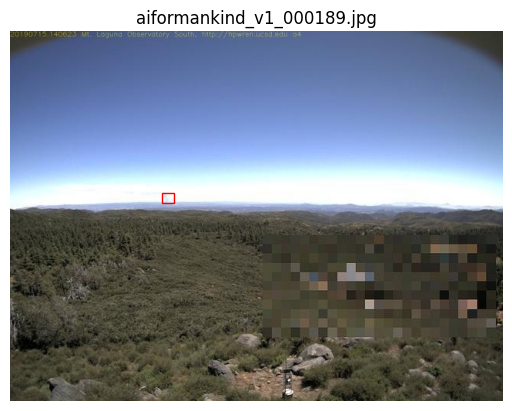

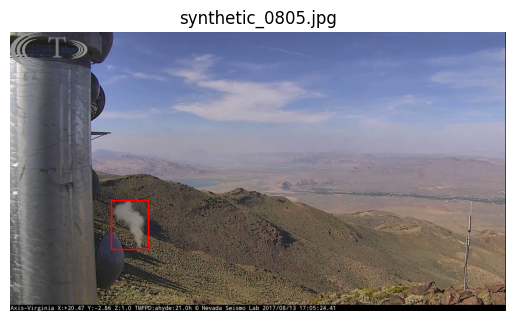

Val images


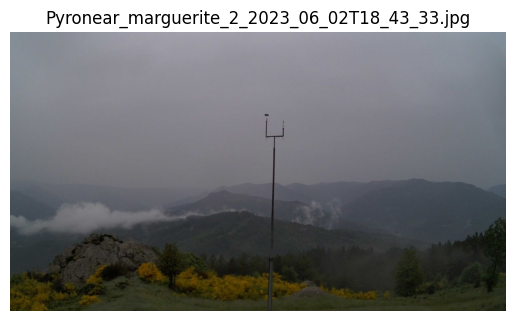

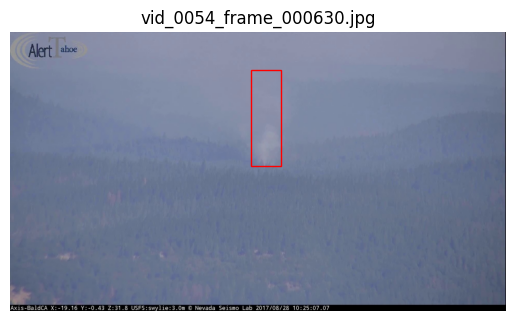

In [6]:
print("Train images")
show_random_images(path_data= os.getenv("PATH_DATASET"), 
                   folder=folders_data[0],
                     mode="train", 
                     n=2, 
                     seed=42)
print("Val images")
show_random_images(path_data= os.getenv("PATH_DATASET"), 
                   folder=folders_data[0],
                     mode="val", 
                     n=2, 
                     seed=42)

### videos

In [7]:
videos = {}

for file_name in train_images:
    prefix = '_'.join(file_name.split('T')[:-1])  # Obtener el prefijo excluyendo el timestamp y la extensión
    if prefix in videos:
        videos[prefix].append(file_name)
    else:
        videos[prefix] = [file_name]
# print(len(videos.keys()))
# drop videos with less than 2 frames
videos = {k: v for k, v in videos.items() if len(v) > 5}
print(len(videos.keys()))

17


In [9]:
# sort videos by number of frames
videos = dict(sorted(videos.items(), key=lambda item: len(item[1]), reverse=True))
for key, value in list(videos.items())[:10]:
    print(f"{key}: {len(value)} frames")
    print(f"Example: {value[0]}")

: 5533 frames
Example: 0674.jpg
ADF_1320_2023_05_23: 137 frames
Example: ADF_1320_2023_05_23T17_18_31.jpg
Pyronear_brison_1_2023_05_25: 98 frames
Example: Pyronear_brison_1_2023_05_25T07_17_13.jpg
Pyronear_brison_1_2023_05_13: 74 frames
Example: Pyronear_brison_1_2023_05_13T08_06_53.jpg
AWF_axis-mtzion1_2023_06_01: 36 frames
Example: AWF_axis-mtzion1_2023_06_01T15_30_37.jpg
AWF_axis-elephant_2023_06_02: 21 frames
Example: AWF_axis-elephant_2023_06_02T11_40_22.jpg
AWF_axis-portlandwesthills2_2023_06_01: 21 frames
Example: AWF_axis-portlandwesthills2_2023_06_01T07_49_44.jpg
AWF_axis-elephant_2023_06_04: 19 frames
Example: AWF_axis-elephant_2023_06_04T11_10_05.jpg
AWF_axis-prarieridge_2023_06_04: 14 frames
Example: AWF_axis-prarieridge_2023_06_04T14_03_40.jpg
AWF_axis-anderson_2023_06_04: 12 frames
Example: AWF_axis-anderson_2023_06_04T11_22_44.jpg


## pyronear_ds_03_2024

In [7]:
files_folder2 = os.listdir(path_data + folders_data[2])
# ['images', 'labels']
# # train and val data as 1) directory: path/images/, 2) file: path/images.txt, or 3) list: [path1/images/, path2/images/]
# train: DS/images/train/
# val: DS/images/val/

# # number of classes
# nc: 1

# # class names
# names: ['smoke']
folder = folders_data[2]

In [8]:
train_images = os.listdir(path_data + folders_data[2] + '/images/train/')
val_images = os.listdir(path_data + folders_data[2] + '/images/val/')

train_labels = os.listdir(path_data + folders_data[2] + '/labels/train/')
val_labels = os.listdir(path_data + folders_data[2] + '/labels/val/')


print(f"Train images: {len(train_images):<10} Fires: {len(train_labels)}")
print(f"Val images  : {len(val_images):<10} Fires: {len(val_labels)}")

Train images: 15760      Fires: 14400
Val images  : 1768       Fires: 1598


### Samples

Train images


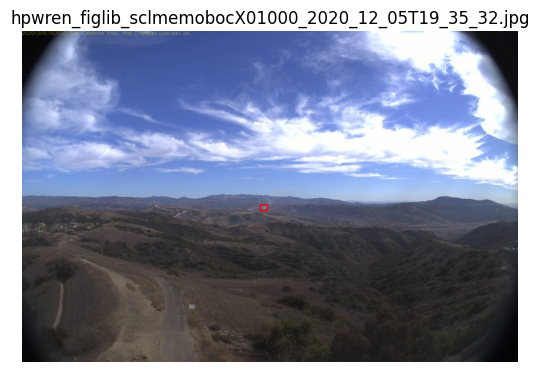

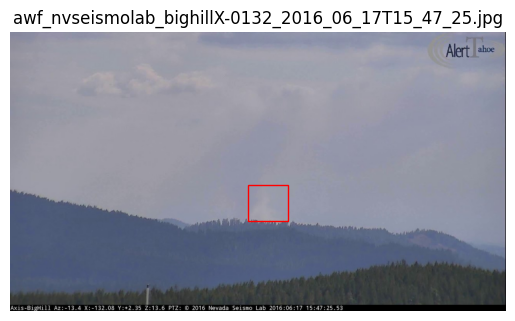

Val images


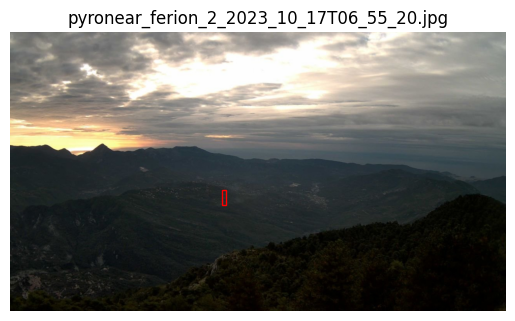

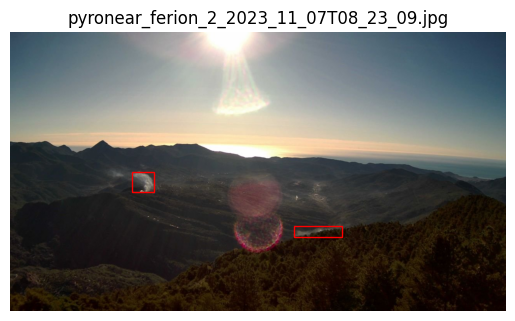

In [9]:
print("Train images")
show_random_images(path_data= os.getenv("PATH_DATASET"),
                    folder=folders_data[2],
                    mode="train", 
                    n=2, 
                    seed=42)
print("Val images")
show_random_images(path_data= os.getenv("PATH_DATASET"),
                    folder=folders_data[2],
                    mode="val", 
                    n=2, 
                    seed=42)



### videos

In [10]:
videos = {}

for file_name in train_images:
    prefix = '_'.join(file_name.split('_')[:-2])  # Obtener el prefijo excluyendo el timestamp y la extensión
    if prefix in videos:
        videos[prefix].append(file_name)
    else:
        videos[prefix] = [file_name]
# print(len(videos.keys()))
# drop videos with less than 2 frames
videos = {k: v for k, v in videos.items() if len(v) > 5}
print(len(videos.keys()))


452


In [116]:
# sort videos by number of frames
videos = dict(sorted(videos.items(), key=lambda item: len(item[1]), reverse=True))
for key, value in list(videos.items())[:10]:
    print(f"{key}: {len(value)} frames")
    print(f"Example: {value[0]}")

: 645 frames
Example: synthetic_0001.jpg
random: 176 frames
Example: random_smoke_00000000.jpg
awf_nvseismolab_mcclellandX-0173_2017_06_06T15: 126 frames
Example: awf_nvseismolab_mcclellandX-0173_2017_06_06T15_00_00.jpg
awf_nvseismolab_noaaX-0135_2017_06_22T14: 125 frames
Example: awf_nvseismolab_noaaX-0135_2017_06_22T14_00_24.jpg
awf_nvseismolab_fairviewX00024_2016_07_20T11: 124 frames
Example: awf_nvseismolab_fairviewX00024_2016_07_20T11_00_23.jpg
awf_nvseismolab_peavineX-0162_2017_09_18T11: 123 frames
Example: awf_nvseismolab_peavineX-0162_2017_09_18T11_01_22.jpg
awf_nvseismolab_woodsonX-0003_2018_11_12T13: 122 frames
Example: awf_nvseismolab_woodsonX-0003_2018_11_12T13_10_01.jpg
awf_nvseismolab_cupertinohillsX00073_2019_06_28T11: 121 frames
Example: awf_nvseismolab_cupertinohillsX00073_2019_06_28T11_01_56.jpg
awf_nvseismolab_noaaX-0050_2015_11_22T16: 120 frames
Example: awf_nvseismolab_noaaX-0050_2015_11_22T16_00_23.jpg
pyronear_brison_3_2023_09_06T13: 120 frames
Example: pyronear_

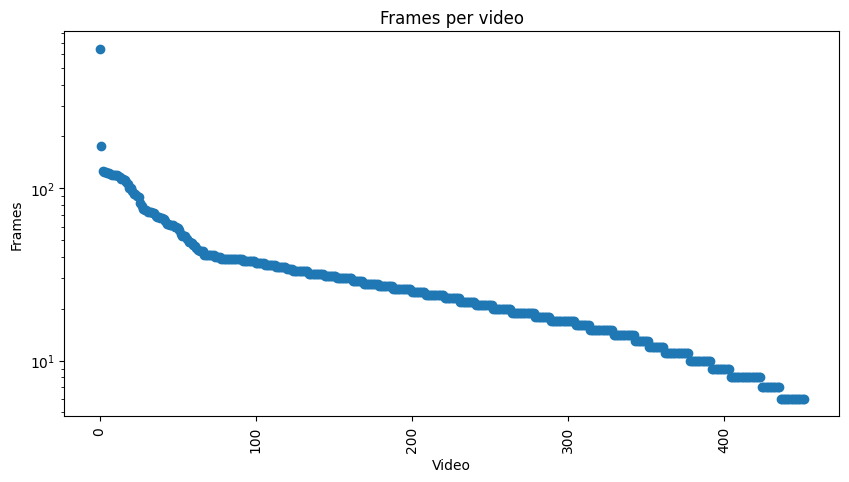

In [12]:
frames_per_video =  np.array([len(v) for v in videos.values()])
# sort
frames_per_video = np.sort(frames_per_video)[::-1]
x = np.arange(len(frames_per_video))

# bar plot
plt.figure(figsize=(10, 5))
plt.scatter(x, frames_per_video)
plt.xticks(rotation=90)
plt.xlabel('Video')
plt.ylabel('Frames')
plt.yscale('log')
plt.title('Frames per video')
plt.show()


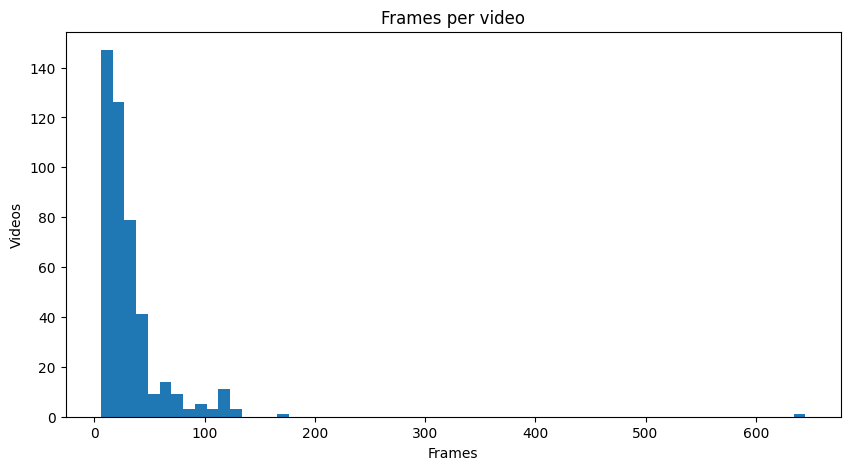

In [17]:
# 
# bar plot
plt.figure(figsize=(10, 5))
plt.hist(frames_per_video, bins=60)
plt.xlabel('Frames')
plt.ylabel('Videos')
# plt.yscale('log')
plt.title('Frames per video')   
plt.show()


In [119]:
n = 5
# random_keys = np.random.choice(list(videos.keys()), n)
random_keys = ["awf_nvseismolab_mcclellandX-0173_2017_06_06T15",
               "pyronear_brison_3_2023_09_06T13",
               "awf_nvseismolab_heavenlyX00004_2016_10_06T07"
               ]


# Obtener los valores correspondientes a las llaves seleccionadas
random_videos = {key: videos[key] for key in random_keys}

for i, video in enumerate(random_videos.keys()):
    frames = random_videos[video]
    
    # Construir la ruta completa de las imágenes
    frames_full_path = [os.path.join(path_data, folder, 'images', 'train', frame) for frame in frames]
    label_full_path = [os.path.join(path_data, folder, 'labels', 'train', frame.replace('.jpg', '.txt')) for frame in frames]
    
    
    fp_out = f"example_gif/example_{i}.gif"
    with contextlib.ExitStack() as stack:
    
        # lazily load images
        imgs = (stack.enter_context(Image.open(f)) for f in frames_full_path)
        
        # extract first image from iterator
        img = next(imgs)
        
        img.save(fp=fp_out, format='GIF', append_images=imgs,
                save_all=True, duration=100, loop=0)

        



In [ ]:
img.save(fp=fp_out, format='GIF', append_images=imgs,
                save_all=True, duration=100, loop=0)

In [128]:
# from IPython.display import Image, display

# # Define la ruta completa de cada imagen
# image_paths = [
#     'example_gif/example_0.gif',
#     'example_gif/example_1.gif',
#     'example_gif/example_2.gif'
# ]

# # Muestra cada imagen en el notebook
# for path in image_paths:
#     display(Image(filename=path, width=500))

### DS_fp

In [32]:
files_folder1 = os.listdir(path_data + folders_data[1])
# ['images', 'labels']

folder = folders_data[1]

In [136]:
train_images = os.listdir(path_data + folders_data[1] + '/images/')

train_labels = os.listdir(path_data + folders_data[1] + '/labels/')

print(f"Train images: {len(train_images):<10} Fires: {len(train_labels)}")
print(f"Val images  : {len(val_images):<10} Fires: {len(val_labels)}")

Train images: 57250      Fires: 50795
Val images  : 1768       Fires: 1598


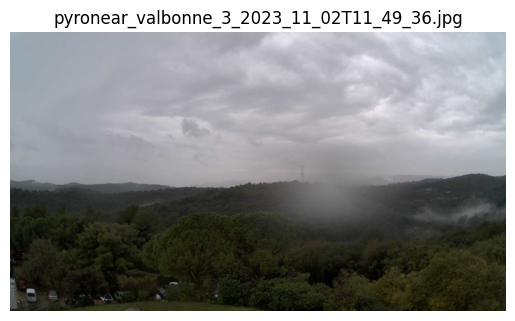

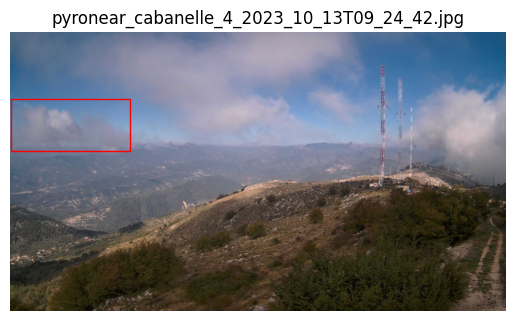

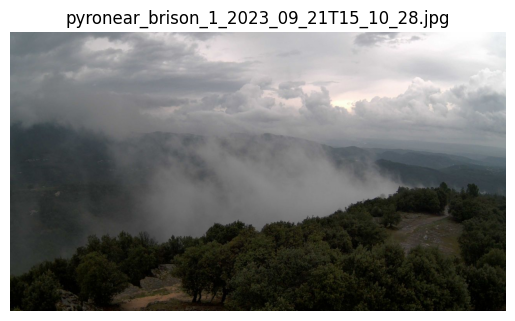

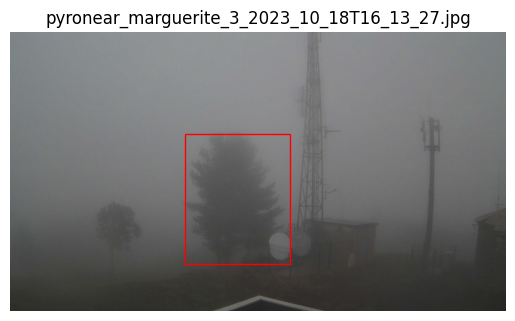

In [139]:
show_random_images(path_data= os.getenv("PATH_DATASET"),
                    folder=folders_data[1],
                    mode="", 
                    n=4, 
                    seed=42)